# Un Circuito Electrico No Lineal

_Matematicas Usadas: Cálculo Elemental y Ecuaciones Diferenciales_



En muchos sistemas eleéctricos, la relación entre el voltaje y la corriente puede ser descrita por ecuaciones diferenciales simples. Sin embargo, en algunos casos, nos encontramos con dispositivos que presentan caracteristicas no lineales. Esto significa, que la relación entre la corriente y el voltaje no es directa, lo que lleva a comportamientos más complejos en el circuito. El tema que abordaremos muestra cómo analizar este tipo de circuitos mediante un modelo matemático que incluye una ecuación diferencial y cómo este comportamiento afecta la estabilidad del sistema. Veremos cómo los diferentes puntos de equilibrio se determinan a través de la intersección de curvas y discutiremos la estabilidad de estos puntos a partir de ciertas condiciones matemáticas.

Antes de abordar el análisis específico del circuito eléctrico no lineal, es importante repasar algunos conceptos fundamentales que nos ayudarán a entender mejor el contexto y los elementos involucrados.

1. _Circuito Eléctrico:_ Un circuito eléctrico es un conjunto de componentes interconectados que permiten el flujo de corriente. La corriente eléctrica es el movimiento de electrones a través de un conductor debido a la diferenciua de potencial (voltaje) entre dos puntos. Los elementos básicos de un circuito incluyen resistencias, fuentes de voltaje y dispositivos que pueden tener un comportamiento no lineal.
2. _Relación Voltaje-Corriente (Ley de Ohm):_ En la mayoria de los circuitos, la relación entre el voltaje $(V)$ y la corriente $(I)$ sigue una relación lineal, como establece la Ley de Ohm: $V=IR$, donde $R$ es la resistencia. Sin embargo, esta relación lineal no siempre se cumple, especialmente cuando se involucran dispositivos con características no lineales.
3. _Dispositivos No Lineales:_ Un dispositivo no lineal es aquel en el que la relación entre el voltaje aplicado y la corriente que circula no sigue una función lineal simple. Esto puede ser representado mediante una función $V=f(I)$, donde $f(I)$ puede ser una forma curva o compleja. Ejemplos comunes de dispositivos no lineales incluyen diodos y transistores.
4. _Ecuaciones Diferenciales:_ Las ecuaciones diferenciales describen cómo cambia una cantidad en relación a otra, como la forma en que la corriente cambia con respecto al tiempo en un circuito. En el análisis de circuitos no lineales, estas ecuaciones son útiles para describir la dinámica del sistema y los posibles estados de equilibrio. En este caso, nos centramos en una ecuación que involucra una resistencia, una fuente de voltaje y un dispositivo no lineal.
5. _Puntos de Equilibrio y Estabilidad:_ Un punto de equilibrio en un sistema eléctrico es un valor de corriente donde las fuerzas o voltajes que actúan en el circuito están balanceados, de manera que la corriente no cambia con el tiempo. Sin embargo, la estabilidad de estos puntos es crucial: un punto de equilibrio es estable si, tras una perturbación pequeña, el sistema tiende a regresar a ese punto. Esto se puede analizar matemáticamente examinando la dereivada de la función que describe el circuito.
6. La inductancia es una propiedad de los componentes eléctricos, como las bobinas o inductores, que mide la capacidad de un circuito para generar un voltaje en respuesta a un cambio en la corriente que lo atraviesa. Se simboliza con la letra  $L$  y se mide en Henrios $(H)$.

Estos conceptos proporcionan el marco necesario para entende el análisis que realizaremos sobre el circuito eléctrico no lineal. A partir de ellos, podremos explorar el comportamiento específico del sistema, los puntos de operación posibles y las condiciones que determinan su estabilidad.

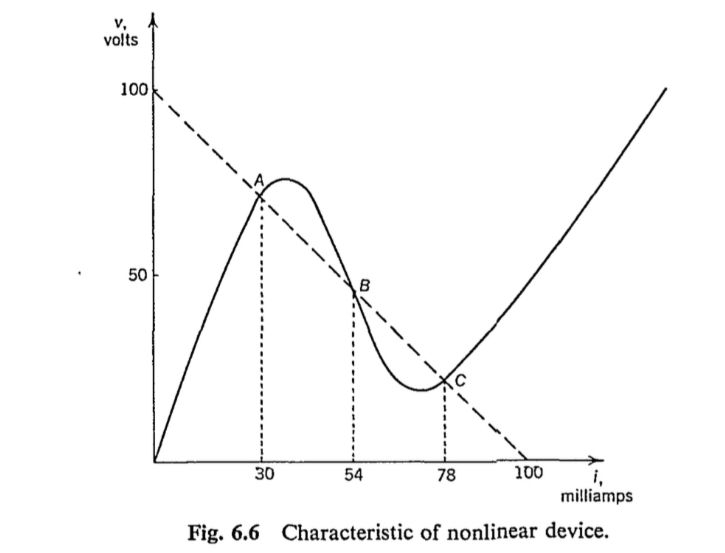

Un dispositivo de corriente continua de dos terminales se sabe que tiene la característica voltaje-corriente mostrada por la línea continua en la Figura 6.6. Supongamos que dicha característica tiene la ecuación $v=f(i)$. El dispositivo está conectado en serie con una bateria de $100 volts$ y un resistor de $1000 ohms$. La ecuación para la corriente $i$ en el circuito resultante es:

$100=1000i+f(i)\cdots(6.36)$ 

Si reescribimos esto en la forma $v=f(i)=100-1000i$, los posibles valores de $i$ se dan por las intersecciones de las curvas $v=f(i)$ y $v=100-1000i$. La primera curva está dada por la línea continua en la Figura 6.6 y la segunda curva por la línea discontinua $ABC$. Los puntos de intersección $A$, $B$ y $C$ de las curvas corresponden a las posibles corrientes en estado estacionario: $30$, $54$ y $78 mA$, aproximadamente.

Experimentalmente se encuentra que es posible operar este circuito en equilibrio en solo dos de los valores de corriente predichos, $30$ y $78 mA$. Se ha encontrado experimentalmente que la operación del circuito no es estable en $54 mA$, y si se intenta operar en esta corriente, el circuito en realidad se estabiliza para operar en $30$ o $78 mA$.



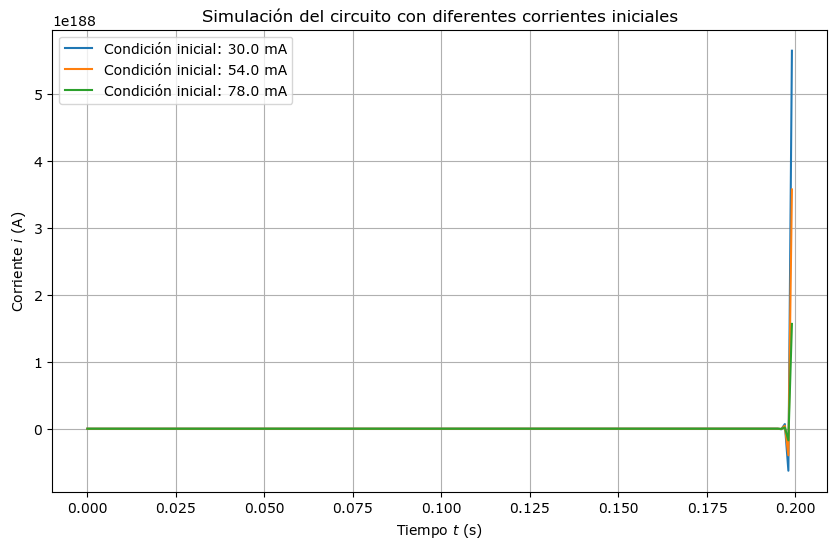

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros del circuito
L = 0.1  # Inductancia en Henrios
R = 1000  # Resistencia en Ohmios
V = 100  # Voltaje de la fuente en Voltios

# Definir la función no lineal f(i)
def f(i):
    # Esta función modela un comportamiento no lineal del circuito.
    return 50 * np.sin(i)

# Derivada de la corriente di/dt basada en la ecuación diferencial
def di_dt(i):
    return (V - R * i - f(i)) / L

# Simulación de la evolución de la corriente
def simulate_circuit(i0, t_max=0.2):
    # Parámetros de simulación
    dt = 0.001  # Paso de tiempo
    time_values = np.arange(0, t_max, dt)
    i_values = np.zeros(len(time_values))
    i_values[0] = i0  # Condición inicial de la corriente

    # Método de Euler para resolver la ecuación diferencial
    for t in range(1, len(time_values)):
        i_values[t] = i_values[t - 1] + di_dt(i_values[t - 1]) * dt

    # Graficar la evolución de la corriente
    plt.plot(time_values, i_values, label=f'Condición inicial: {i0*1000:.1f} mA')

# Simular con diferentes condiciones iniciales
plt.figure(figsize=(10, 6))
simulate_circuit(0.03, t_max=0.2)  # 30 mA, cercano a un punto de equilibrio estable
simulate_circuit(0.054, t_max=0.2)  # 54 mA, punto de equilibrio inestable
simulate_circuit(0.078, t_max=0.2)  # 78 mA, cercano a un punto de equilibrio estable

# Configurar la gráfica
plt.title('Simulación del circuito con diferentes corrientes iniciales')
plt.xlabel('Tiempo $t$ (s)')
plt.ylabel('Corriente $i$ (A)')
plt.grid(True)
plt.legend()
plt.show()

Se puede argumentar que si el circuito opera a $54 mA$ y disminuimos ligeramente la corriente, se puede ver en la Figura 6.6 que el voltaje a través del dispositivo no lineal aumenta más que la disminución del voltaje a través del resistor; es decir, el voltaje combinado aumenta a más de $100 volts$. Esto significa que la bateria de $100 volts$ será capaz de impulsar incluso menos corriente a través del dispostivo, y la corriente continuará disminuyendo. De manera similar, si la corriente aumenta a un valor ligeramente superior a $54 mA$, habrá una tendencia a que siga aumentando. En contraste, el punto $A$, si la corriente aumenta, el voltaje a través de tanto el dispositivo no lineal como la resistencia aumentará y el voltaje total aumentará a más de $100 volts$. La batería de $100 volts$ no podrá proporcionar la corriente requerida y la corriente en el circuito disminuirá, devolviendo el punto de operación a $A$. 

En términos matemáticos, este argumento significa que si la corriente en un punto de operación es $i$, este es un punto de operación estable si:


$\frac{d}{di}[1000i+f(i)]>0$;

es decir,


$1000+f'(i)>0\cdots(6.37)$

Esta condición se satisface obviamente en $A$ y $C$ ya que $f'(i)$ es mayor que cero en ambos puntos. El punto de operación es inestable si la desigualdad se invierte en _(6.37)_. En el punto $B$ tenemos $f'(i)\approx-2,500$; esto implica que el punto $B$ es inestable.

Dichos argumentos semifísicos pueden ser peligrosos, como ya se señaló, y es más satisfactorio argumentar de la siguiente manera. Siempre hay una inductancia residual en un circuito eléctrico, y, cuando las corrientes cambian lentamente, un mejor modelo que el _(6.36)_ asumiendo que la característica $v-i$ del dispositivo no lineal sigue siendo adecuada, es:

$100=L\frac{dx}{dt}+1000x+f(x)\cdots(6.38)$

donde $x$ es ahora la corriente transitoria en el circuito. Supongamos que $x=I$ es una corriente en estado estacionario; es decir,

$100=1000i+f(i)\cdots(6.39)$

Establecemos $x=i+z$, donde $z$ es pequeño en comparación con $i$. Entonces:

$f(x)\approx f(i)+zf'(i)$

Restando _(6.39)_ de _(6.38)_ y usando esta aproximación, vemos que, para $z$ pequeño, 

$L\frac{dz}{dt}+[1000+f'(i)]z=0$.

La solución a esta ecuación es una exponencial que aumentará si el coeficiente de $z$ en esta ecuacíón es negativo, y disminuira si es positivo. Por lo tanto, el circuito es estable (inestable) si $1000+f'(i)$ es mayor (menor) que cero. Este es precisamente el criterio dado por el argumento físico que llevó a _(6.37)_.

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider
from scipy.integrate import solve_ivp

# Definir la función no lineal f(i)
def f(i, a):
    # Función no lineal ajustable, con parámetro a que controla la amplitud
    return a * np.sin(i)

# Derivada de la corriente para el método de Euler
def dx_dt(x, L, R, V, a):
    return (V - R * x - f(x, a)) / L

# Simulación de la evolución de la corriente
def simulate_circuit(L, R, V, a):
    # Parámetros de la simulación
    dt = 0.001  # Paso de tiempo
    t_max = 0.1  # Tiempo máximo de simulación en segundos
    time_values = np.arange(0, t_max, dt)
    x_values = np.zeros(len(time_values))
    x_values[0] = 0.01  # Valor inicial de la corriente

    # Método de Euler para resolver la ecuación diferencial
    for i in range(1, len(time_values)):
        x_values[i] = x_values[i - 1] + dx_dt(x_values[i - 1], L, R, V, a) * dt

    # Graficar la evolución de la corriente
    plt.figure(figsize=(8, 5))
    plt.plot(time_values, x_values, label='Evolución de la corriente $x(t)$', color='blue')
    plt.title(f'Simulación con L={L} H, R={R} Ohm, V={V} V, a={a}')
    plt.xlabel('Tiempo $t$ (s)')
    plt.ylabel('Corriente $x$ (A)')
    plt.grid(True)
    plt.legend()
    plt.show()

# Creación de los controles interactivos
interact(
    simulate_circuit,
    L=FloatSlider(value=0.1, min=0.01, max=1.0, step=0.01, description='L (H)'),
    R=FloatSlider(value=1000, min=100, max=2000, step=10, description='R (Ohm)'),
    V=FloatSlider(value=100, min=10, max=200, step=10, description='V (V)'),
    a=FloatSlider(value=50, min=10, max=100, step=1, description='a')
)

interactive(children=(FloatSlider(value=0.1, description='L (H)', max=1.0, min=0.01, step=0.01), FloatSlider(v…

<function __main__.simulate_circuit(L, R, V, a)>

# Explicación del código:

Permite a los usuarios ajustar los valores de los parámetros del circuito y observar cómo estos afectan la evolución de la corriente en tiempo real. Esto es especialmente útil para estudiar la respuesta del circuito no lineal y cómo la elección de parámetros como la resistencias, la inductancia, voltaje, o la forma de la función no lineal $f(i)$ influye en el comportamiento del sistema. 

1. _Configuración de la Función No Lineal_: $f(i,a)$: Define la relación no lineal entre el voltaje y la corriente, donde $a$ es un parametro que ajusta la amplitud de la función sinusoidal. Esto permite al usuario experimentar con diferentes formas de la característica no lineal.
2. _Ecuación Diferencial:_ dx_dt$(x,L,R,V,a):$ Representa la derivada de la corriente que depende de los parámetros ajustables de inductancia $L$, resistencia $R$, voltaje $V$, y el parámetro $a$ de la función no lineal.
3. _Simulación de la Corriente:_ simulate_circuit$(L,R,V,a):$ Realiza la simulación utilizando el método de Euler y grafica la evolución de la corriente en el tiempo. El usuario puede ajustar los parámetros y ver cómo estos afectan la dinámica del sistema.
4. _Interfaz Interactiva:_ interact: se usa para crear una interfaz gráfica interactiva con controles deslizantes para los parámetros $L,R,V$ y $a$. Esto permite que los usuarios ajusten estos valores y vean inmediatamente cómo cambia la simulación.

# Resultado esperado:

- La gráfica mostrará cómo la corriente cambia a lo largo del tiempo en respuesta a las variaciones de los parámetros.
- Al ajustar la inductancia $L$, la respuesta del circuito se volverá más rapida o más lenta.
- Modificando $R$ o $V$, se podrá observar cómo cambia el valor al que la corriente tiende.
- Ajustando el parámetro $a$, se pueden estudiar los efectos de distintas características no lineales del dispositivo sobre el comportamiento del sistema.

# Algunos datos extra:

- Circuitos No Lineales en la Naturaleza:
Los circuitos no lineales no son solo un concepto abstracto de la ingeniería, sino que su comportamiento se encuentra en muchos sistemas naturales. Por ejemplo, las neuronas en el cerebro humano son sistemas no lineales, ya que la relación entre los estímulos eléctricos y la respuesta de una neurona no sigue una línea recta. Esto hace que los modelos de circuitos no lineales sean útiles para estudiar redes neuronales y la actividad cerebral.

- Aplicaciones Prácticas en Electrónica:
Los dispositivos no lineales, como los transistores y los diodos, son esenciales para la electrónica moderna. Sin ellos, no tendríamos computadoras, smartphones ni muchos dispositivos electrónicos. Los transistores, en particular, actúan como interruptores controlables que amplifican señales, y su comportamiento no lineal permite el funcionamiento de todos los circuitos integrados.

- Historia del Comportamiento No Lineal:
Los fenómenos no lineales han sido objeto de estudio desde hace más de un siglo, con científicos como Henri Poincaré, quien exploró el comportamiento caótico en sistemas dinámicos. Aunque los sistemas no lineales eran inicialmente vistos como complicados y difíciles de manejar, hoy en día son fundamentales para entender muchos aspectos de la ciencia y la ingeniería, incluyendo la teoría del caos.

# En resumen:

El tema “A Nonlinear Electrical Circuit” aborda el análisis de un circuito eléctrico que incluye un dispositivo no lineal. La idea principal es estudiar cómo se comporta la corriente en un circuito cuando la relación entre el voltaje y la corriente no sigue una ley simple y lineal, como la Ley de Ohm. En este caso, el circuito está compuesto por una fuente de voltaje de 100 volts, un resistor de 1000 ohmios, y un dispositivo no lineal cuya característica está descrita por una función ￼.

El análisis se enfoca en determinar los puntos de operación posibles para la corriente en el circuito, es decir, los puntos de equilibrio donde el voltaje de la fuente y la caída de voltaje en el resistor y el dispositivo no lineal se equilibran. Esto se realiza mediante la intersección de dos curvas: ￼, que describe el comportamiento del dispositivo no lineal, y ￼, que representa la caída de voltaje debido a la resistencia.

La discusión también incluye la estabilidad de estos puntos de equilibrio. Se menciona que, aunque hay tres posibles valores de corriente (30 mA, 54 mA, y 78 mA), solo dos de ellos son estables: 30 mA y 78 mA. El valor de 54 mA resulta ser inestable, ya que una pequeña perturbación hace que la corriente se desplace hacia otro punto de equilibrio.

Para entender la estabilidad, se analiza matemáticamente la derivada de la función total de voltaje con respecto a la corriente, lo cual permite determinar si un punto de operación es estable o inestable. Además, se introduce una ecuación diferencial que describe el comportamiento dinámico del circuito, considerando la existencia de una inductancia pequeña.

En resumen, este tema explora cómo un circuito eléctrico con características no lineales puede tener varios estados de operación y cómo las herramientas matemáticas, como las ecuaciones diferenciales y el análisis de estabilidad, permiten predecir su comportamiento bajo diferentes condiciones. Es un ejemplo de cómo la teoría matemática y la física aplicada se combinan para estudiar sistemas reales con comportamientos complejos.

# Conclusión:

Para concluir, hemos visto que el análisis de circuitos no lineales nos permite entender mejor los fenómenos que ocurren cuando un sistema no sigue una relación lineal simple entre el voltaje y la corriente. A través de la ecuación diferencial y el análisis de estabilidad, podemos identificar los puntos de operación estables e inestables del circuito, lo que es fundamental para diseñar y manejar estos sistemas de manera efectiva. Este tipo de análisis no solo es importante para la teoría, sino que también tiene aplicaciones prácticas en el diseño de dispositivos eléctricos que deben operar de manera segura y eficiente. Entender la estabilidad de estos circuitos nos ayuda a prever cómo reaccionarán ante cambios en la corriente, lo que es esencial para su correcto funcionamiento en entornos reales.